In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append("..")
from src import picture_contours
from src import helper
from src import color_schemes
from src import picture_plot
from src import c_picture_worker
from src.Gaussian import get_gaussian_from_list

In [2]:
def get_plot(img, gaussians):
    fig, ax = plt.subplots(1,1)
    extent = [*helper.get_x_values(gaussians), *helper.get_y_values(gaussians)]
    ax.imshow(img, extent=extent, origin='lower')

In [3]:
size = 100

In [4]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [5]:
gaussian_1 = [-10, 10, -10, 10, [-5, -5], [[ 5, 0],[0, 5]], size]
gaussian_2 = [-10, 10, -10, 10, [0, 0], [[ 5, 0],[0, 5]], size]
gaussian_3 = [-10, 10, -10, 10, [5, 5], [[ 20, 0],[0, 20]], size]
gaussian_4 = [-10, 10, -10, 10, [-2, 0], [[ 5, 0],[0, 5]], size]
gaussian_5 = [-10, 10, -10, 10, [0, 2], [[ 10, 0],[0, 15]], size]
gaussians = [get_gaussian_from_list(gaussian_1), get_gaussian_from_list(gaussian_2), get_gaussian_from_list(gaussian_3), get_gaussian_from_list(gaussian_4), get_gaussian_from_list(gaussian_5)]

In [6]:
z_list = helper.generate_distributions(gaussians)
z_min, z_max, z_sum = helper.generate_weights(z_list)

In [7]:
img_list = picture_contours.generate_img_list(z_list, z_min, z_max, colorschemes, 0., 1.)

In [8]:
picture, _ = c_picture_worker.call_hierarchic_merge(img_list, z_list, colorspace="rgb")

In [9]:
picture_1, _ = c_picture_worker.call_hierarchic_alpha_sum_merge(img_list, z_list)

In [10]:
picture_2, _ = c_picture_worker.call_l2_sum_merge(img_list, z_list, colorspace="rgb")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


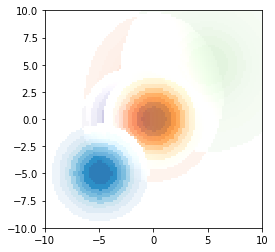

In [11]:
get_plot(picture_2, gaussians)

In [29]:
import numpy as np

In [32]:
z_list[0].shape

(100, 100)

In [37]:
new_img.shape[1]

100

In [44]:
new_img = np.zeros(img_list[0].shape,dtype=float)
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        z_sum = 0
        for k in range(5):
            z_sum += z_list[k][i][j]
        res = 0
        for k in range(5):
            res += img_list[k][i][j]* (z_list[k][i][j] / z_sum)**2
        new_img[i,j]=res**(1/2)

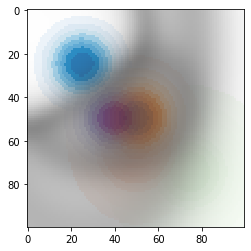

In [45]:
plt.imshow(new_img)

In [13]:
res**(1/2)

array([0.50082392, 0.3535836 , 0.32857291])

In [14]:
picture_2[50][50]

array([0.78173238, 0.48557403, 0.32038672])

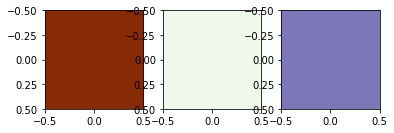

In [15]:
fig, axes = plt.subplots(1,3)
for i in range(1,4):
    axes[i-1].imshow([[img_list[i][50][50]]])

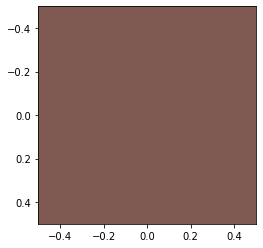

In [16]:
plt.imshow([[res**(1/2)]])

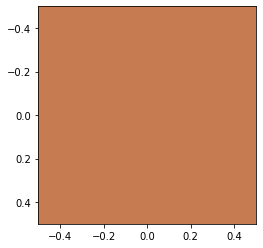

In [17]:
plt.imshow([[picture_2[50][50]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


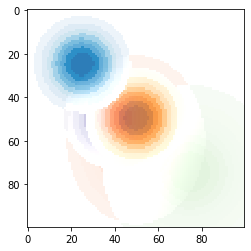

In [18]:
plt.imshow(picture_2)

In [19]:
res**(1/2)

array([0.50082392, 0.3535836 , 0.32857291])

In [20]:
picture_2[50][50]

array([0.78173238, 0.48557403, 0.32038672])

In [21]:
img_list[1][50][50]

array([0.53306552, 0.16910716, 0.01568627])

In [22]:
img_list[2][50][50]

array([0.93786667, 0.97593098, 0.92387138])

In [23]:
img_list[3][50][50]

array([0.48973334, 0.47018754, 0.71940749])

In [24]:
picture_2[50][50]

array([0.78173238, 0.48557403, 0.32038672])

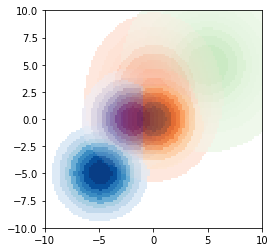

In [25]:
get_plot(picture, gaussians)

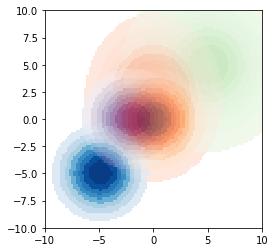

In [26]:
get_plot(picture_1, gaussians)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


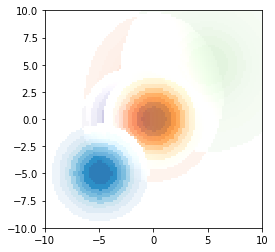

In [27]:
get_plot(picture_2, gaussians)